Evaluating the estimated intrinsic dimensions on simulated curves and comparing with a baseline method.

# Packages importation and general configuration

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
%matplotlib notebook

In [3]:
from genepy3d.obj import curves
from genepy3d.util import geo, plot as mypl

# Default parameters

In [96]:
# evaluation metric
measure = "f1"

# baseline params
eps_line = 5*1e-5
eps_plane = 5*1e-7

# simulation params
max_seg = 5
nbcrvs = 100
sig_noise_ref = np.arange(0,32,2)
print("sigma of noise:",sig_noise_ref)

nbcases = len(sig_noise_ref)*nbcrvs
print('nb. of cases:',nbcases)

nbcpus = 35
timepercase = 1 # minutes
print('estimated times (min):',(nbcases/nbcpus*timepercase)*1.5)

sigma of noise: [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30]
nb. of cases: 1600
estimated times (min): 68.57142857142857


# Loading estimated results

In [122]:
simdata = np.load("../data/validation/simulation/simulation_results_30_100_p1000_fixscale_r20.npy",allow_pickle=True)

# Default plotting parameters

In [123]:
mpl.style.use('default')
font = {'size':25}
lines = {'markersize':15,'linewidth':3}
mpl.rc('font', **font)
mpl.rc('lines',**lines)

# Quantification

## Building dataframe

In [124]:
method, noise, dim, score, pre, rec = [], [], [], [], [], []
for i in range(nbcases):
#     print(i,simdata[i]["flag"],sig_noise_ref[i//nbcrvs])
    dimlst = ["line", "plane", "3d"]
    if simdata[i]["flag"] == 0: # no error
        for idim in range(3):
            if simdata[i]["proposition"][2] is not None:
                noise.append(sig_noise_ref[i//nbcrvs])
                method.append("proposition")
                dim.append(dimlst[idim])
                score.append(simdata[i]["proposition"][2][idim][0])
                pre.append(simdata[i]["proposition"][2][idim][1])
                rec.append(simdata[i]["proposition"][2][idim][2])

            if simdata[i]["baseline"][2] is not None:
                noise.append(sig_noise_ref[i//nbcrvs])
                method.append("baseline")
                dim.append(dimlst[idim])
                score.append(simdata[i]["baseline"][2][idim][0])
                pre.append(simdata[i]["baseline"][2][idim][1])
                rec.append(simdata[i]["baseline"][2][idim][2])
    
df = pd.DataFrame({"method":method,"noise":noise,"dim":dim,
                   "score":score, "precision":pre, "recall":rec})

df = df[df["score"]!=-1]

df.head()

method  noise    dim     score  precision    recall
0  proposition      0   line  0.781609    0.85000  0.723404
1     baseline      0   line  0.989247    1.00000  0.978723
2  proposition      0  plane  0.993069    1.00000  0.986251
3     baseline      0  plane  0.665359    0.49902  0.998047
4  proposition      0     3d  0.984615    1.00000  0.969697

## F1 score

<IPython.core.display.Javascript object>


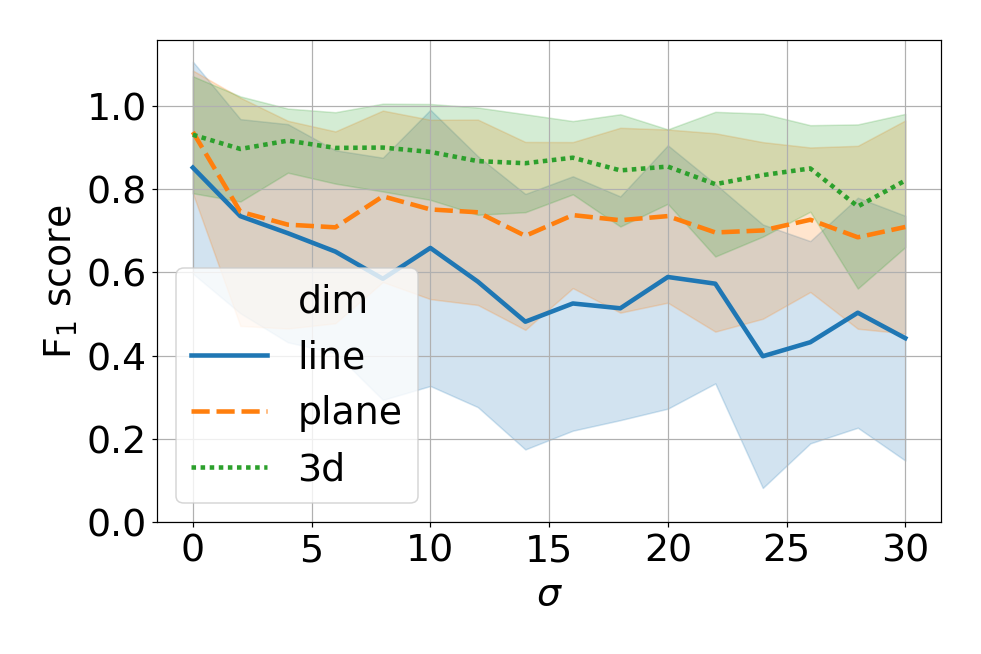

In [125]:
### Proposed method
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ln = sns.lineplot(x="noise", y="score", hue="dim", data=df[df["method"]=="proposition"], 
             ci='sd', style="dim",markers=False,legend="full",alpha=1.0)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'F$_1$ score')
ax.set_xticks(np.arange(0,31,5));
ax.set_yticks(np.arange(0,1.2,0.2));
ax.grid('on');
plt.tight_layout();

<IPython.core.display.Javascript object>


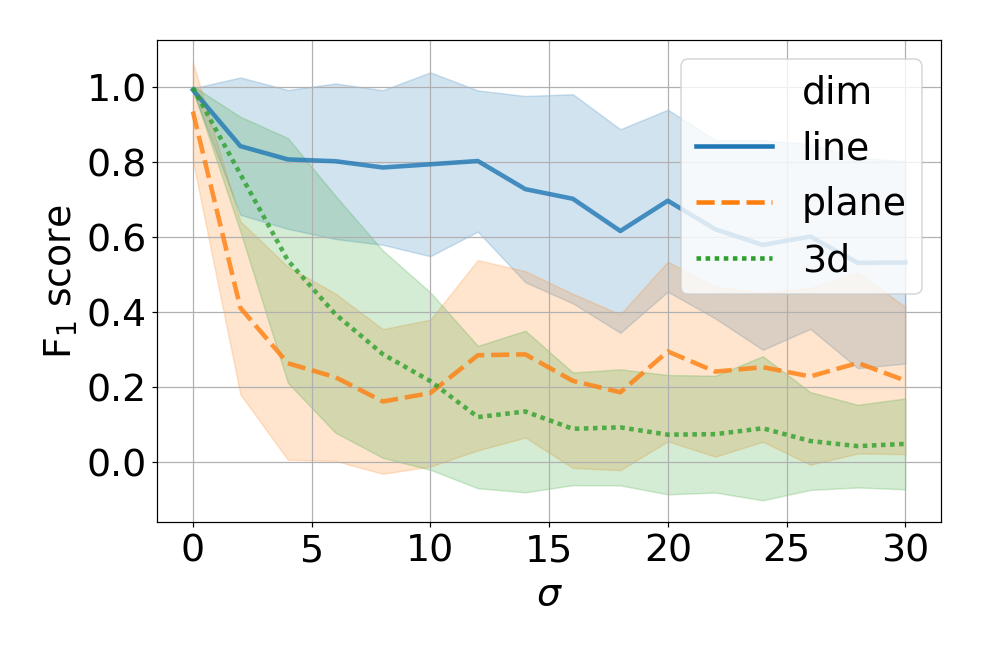

In [126]:
# baseline
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

sns.lineplot(x="noise", y="score", hue="dim", data=df[df["method"]=="baseline"], 
             ci='sd', style="dim", markers=False, legend="full",alpha=0.8)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'F$_1$ score')
ax.set_xticks(np.arange(0,31,5));
ax.set_yticks(np.arange(0,1.2,0.2));
ax.grid('on');
plt.tight_layout();

## Precision

<IPython.core.display.Javascript object>


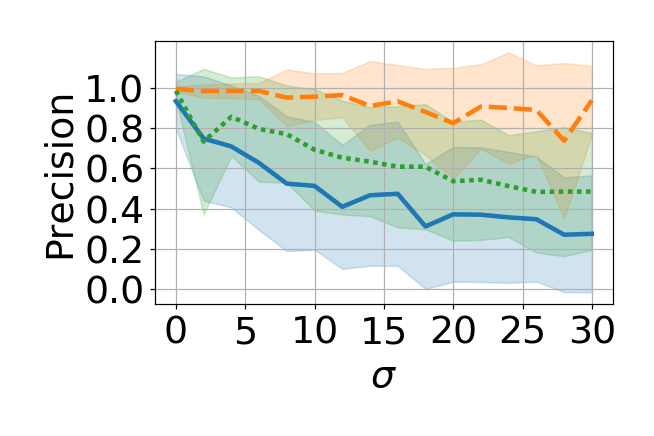

In [102]:
# Proposed method
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ln = sns.lineplot(x="noise", y="precision", hue="dim", data=df[df["method"]=="proposition"], 
             ci='sd', style="dim",markers=False,legend=False,alpha=1.0)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'Precision')
ax.set_xticks(np.arange(0,31,5));
ax.set_yticks(np.arange(0,1.2,0.2));
ax.grid('on');
plt.tight_layout();

<IPython.core.display.Javascript object>


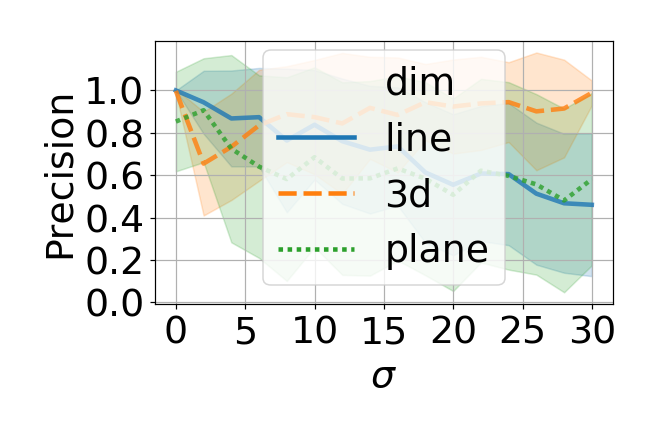

In [103]:
# baseline
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

sns.lineplot(x="noise", y="precision", hue="dim", data=df[df["method"]=="baseline"], 
             ci='sd', style="dim", markers=False, legend="full",alpha=0.8)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'Precision')
ax.set_xticks(np.arange(0,31,5));
ax.set_yticks(np.arange(0,1.2,0.2));
ax.grid('on');
plt.tight_layout();

## Recall

<IPython.core.display.Javascript object>


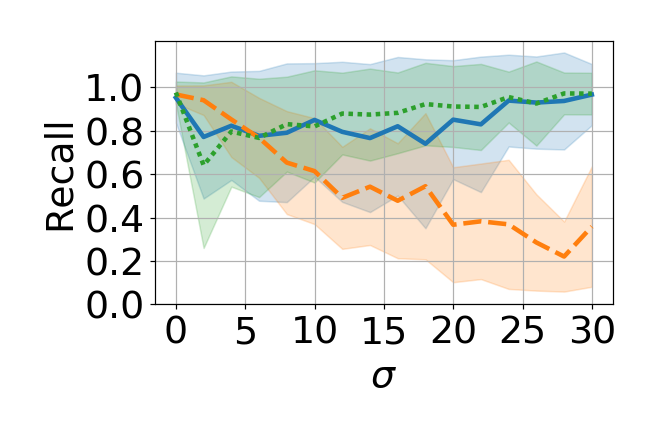

In [104]:
# Proposed method
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ln = sns.lineplot(x="noise", y="recall", hue="dim", data=df[df["method"]=="proposition"], 
             ci='sd', style="dim",markers=False,legend=False,alpha=1.0)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'Recall')
ax.set_xticks(np.arange(0,31,5));
ax.set_yticks(np.arange(0,1.2,0.2));
ax.grid('on');
plt.tight_layout();

<IPython.core.display.Javascript object>


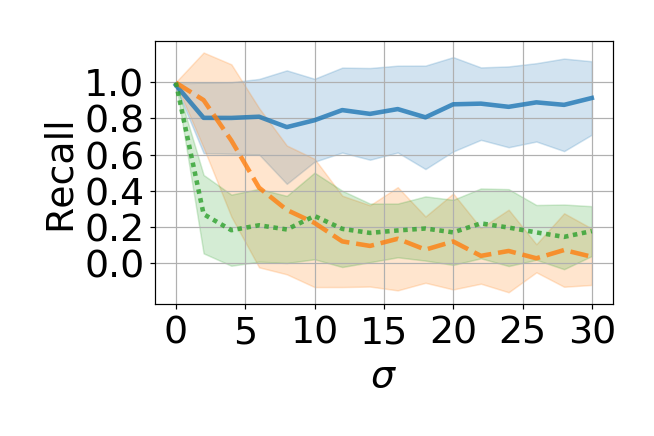

In [105]:
# baseline
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

sns.lineplot(x="noise", y="recall", hue="dim", data=df[df["method"]=="baseline"], 
             ci='sd', style="dim", markers=False, legend=False,alpha=0.8)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'Recall')
ax.set_xticks(np.arange(0,31,5));
ax.set_yticks(np.arange(0,1.2,0.2));
ax.grid('on');
plt.tight_layout();

# Examples

In [15]:
ixlst = []
for j in range(1000,1100):
    
    line_flag, plane_flag,threed_flag = False, False, False
    tmp = simdata[j]['model'].seg_lbl
    
    if 0 in tmp:
        threed_flag = True
    if 1 in tmp:
        plane_flag = True
    if 2 in tmp:
        line_flag = True

    if (line_flag==True) & (plane_flag==True) & (threed_flag==True):
        ixlst.append(j)
        
print(ixlst)

[1002, 1006, 1008, 1009, 1011, 1020, 1026, 1036, 1040, 1049, 1052, 1053, 1054, 1056, 1059, 1065, 1081, 1082, 1083, 1084, 1088, 1092, 1096, 1097]


## Example 1

Crop info (GIMP): 1074, 549, 1749, 1392

### Simulation

In [16]:
data = simdata[22]
model = data['model']
print("segments:",model.seg_lbl)
print("sigma:",model.sigma)

segments: [1, 2]
sigma: 1


<IPython.core.display.Javascript object>


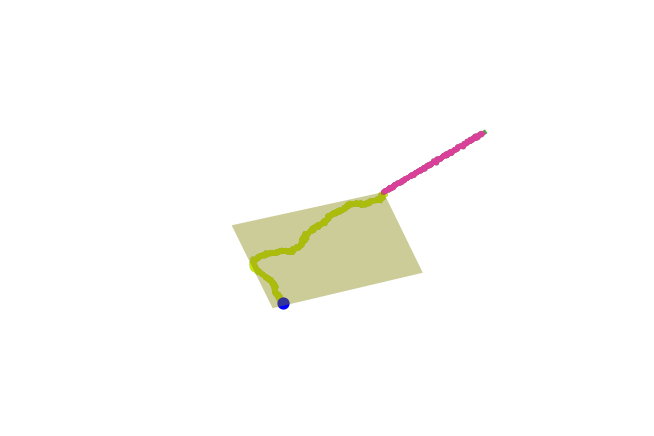

../data/genepy3d-201912/genepy3d/util/geo.py:343: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (a, b, c),resid,rank,s = np.linalg.lstsq(G, Z)


In [17]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection="3d")
model.plot(ax=ax,projection="3d",noisy=True);
ax.view_init(azim=55,elev=30)
ax.axis('off');
plt.tight_layout();

### Proposed method

In [18]:
print("our method:\n---")
print("predict score:",data["our"][3])
print("predict segment length:",data["our"][4])
print("predict r:",data["our"][5])
print("evaluation detail:")
[print(item) for item in data["our"][2]];

our method:
---
predict score: 0.9762720676860539
predict segment length: 10
predict r: 10
evaluation detail:
[0.9907120743034055, 0.9815950920245399, 1.0]
[0.9618320610687023, 1.0, 0.9264705882352942]
[-1, -1, -1]


{'planeline_pred': [[0, 629], [673, 999]], 'line_pred': [[0, 75], [90, 126], [249, 278], [351, 519], [572, 601], [674, 999]]}


<IPython.core.display.Javascript object>


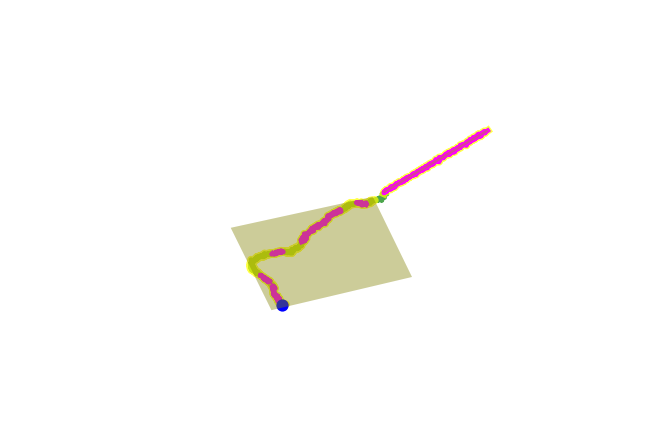

In [19]:
crvn = model.get_curve(noisy=True)
crvnf = crvn.scaled_curve(data['est_noise_scale'])

eps_seg_len = data["our"][4]
sig_c, delta_c = data["our"][6], data["our"][7]/data["our"][6]

res = crvnf.decompose_intrinsicdim(sig_c,delta_c,sig_step,eps_kappa,eps_tau,eps_seg_len,eps_crv_len)
print(res)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
crvnf.plot_intrinsicdim(ax,overrided_curve=crvn);
ax.view_init(azim=55,elev=30)
ax.axis('off');
plt.tight_layout();

### Baseline

In [20]:
print("baseline:\n---")
print("predict score:",data["baseline"][3])
print("predict segment length:",data["baseline"][4])
print("predict r:",data["baseline"][5])
print("evaluation detail:")
[print(item) for item in data["baseline"][2]];

baseline:
---
predict score: 0.5995808178227577
predict segment length: 10
predict r: 1
evaluation detail:
[0.9792663476874003, 1.0, 0.959375]
[0.2198952879581152, 1.0, 0.12352941176470589]
[-1, -1, -1]


<IPython.core.display.Javascript object>


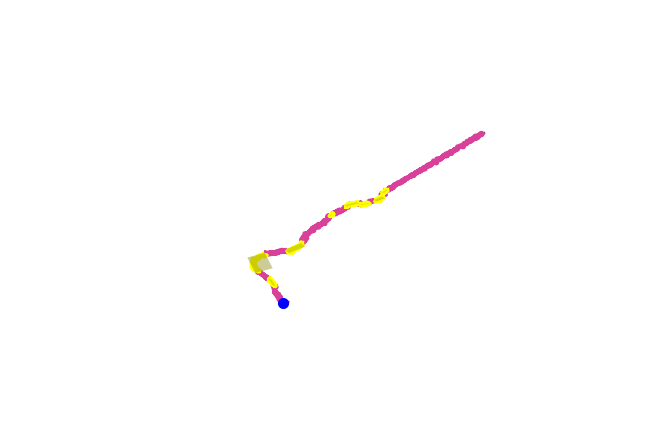

In [21]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')

linesegs = data["baseline"][0][data["baseline"][4]][data["baseline"][5]]
planesegs = data["baseline"][1][data["baseline"][4]][data["baseline"][5]]

crvtmp = crvn

param = mypl.fix_equal_axis(crvtmp.coors)
ax.set_xlim(param['xmin'],param['xmax'])
ax.set_ylim(param['ymin'],param['ymax'])
ax.set_zlim(param['zmin'],param['zmax'])

x, y, z = crvtmp.coors[:,0], crvtmp.coors[:,1], crvtmp.coors[:,2]

ax.scatter(x[0],y[0],z[0],c='blue',s=40)

# 3d
ax.plot(x,y,z,c='green',lw=1)

# line
for seg in linesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c=(0.85,0.25,0.6),alpha=1.0)

# plane
for seg in planesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c='yellow')
    
    coors = crvtmp.coors[seg[0]:seg[1]+1]
    coef,normal = geo.fit_plane(coors)
    maxx = np.max(coors[:,0])
    maxy = np.max(coors[:,1])
    minx = np.min(coors[:,0])
    miny = np.min(coors[:,1])

    pnt = np.array([0.0, 0.0, coef])
    d = -pnt.dot(normal)

    xx, yy = np.meshgrid([minx, maxx], [miny, maxy])
    zz = (-normal[0]*xx - normal[1]*yy - d)*1. / normal[2]

    ax.plot_surface(xx, yy, zz, color='yellow',alpha=0.4)
    
ax.view_init(azim=55,elev=30)
ax.axis('off');
plt.tight_layout();

## Example 2

Crop info (GIMP): 1347, 42, 1917, 1548

205, 208, 217, 226, 229, 230, 231, 240, 248, 249, 250, 263, 265, 272, 279, 281, 285, 286, 297

### Simulation

In [22]:
data = simdata[272]
model = data['model']
print("segments:",model.seg_lbl)
print("sigma:",model.sigma)

segments: [0, 2, 1]
sigma: 3


<IPython.core.display.Javascript object>


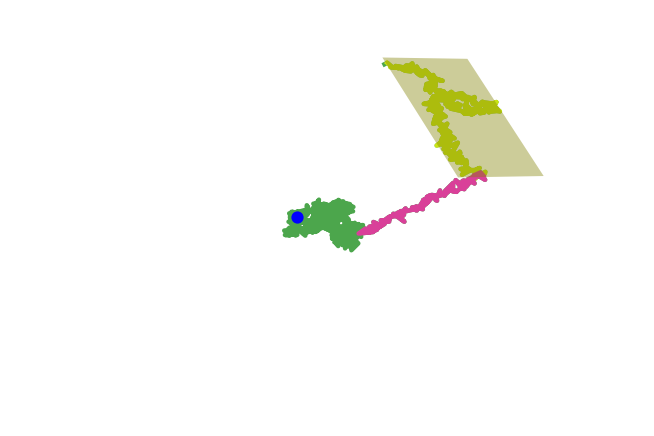

In [23]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection="3d")
model.plot(ax=ax,projection="3d",noisy=True);
ax.view_init(azim=51,elev=1)
ax.axis('off');
plt.tight_layout();

### Proposed method

In [24]:
print("our method:\n---")
print("predict score:",data["our"][3])
print("predict segment length:",data["our"][4])
print("predict r:",data["our"][5])
print("evaluation detail:")
[print(item) for item in data["our"][2]];

our method:
---
predict score: 0.9373041738402711
predict segment length: 10
predict r: 22
evaluation detail:
[0.8494623655913979, 1.0, 0.7383177570093458]
[0.9632495164410058, 1.0, 0.9291044776119403]
[0.9992006394884093, 0.9984025559105432, 1.0]


{'planeline_pred': [[626, 747], [751, 999]], 'line_pred': [[626, 704], [751, 798], [923, 999]]}


<IPython.core.display.Javascript object>


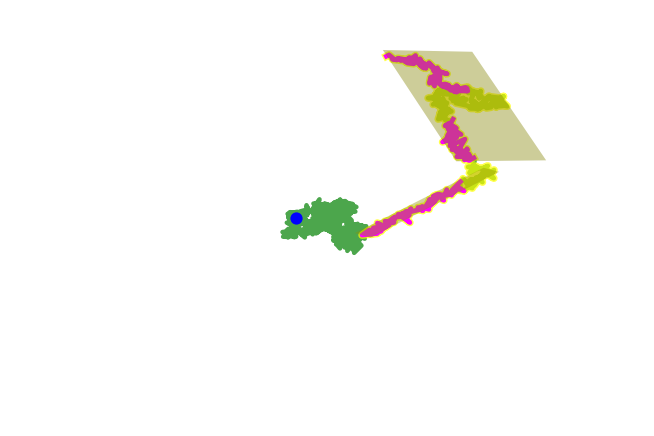

In [25]:
crvn = model.get_curve(noisy=True)
crvnf = crvn.scaled_curve(data['est_noise_scale'])

eps_seg_len = data["our"][4]
sig_c, delta_c = data["our"][6], data["our"][7]/data["our"][6]

res = crvnf.decompose_intrinsicdim(sig_c,delta_c,sig_step,eps_kappa,eps_tau,eps_seg_len,eps_crv_len)
print(res)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
crvnf.plot_intrinsicdim(ax,overrided_curve=crvn);
ax.view_init(azim=50,elev=1)
ax.axis('off');
plt.tight_layout();

### Baseline

In [26]:
print("baseline:\n---")
print("predict score:",data["baseline"][3])
print("predict segment length:",data["baseline"][4])
print("predict r:",data["baseline"][5])
print("evaluation detail:")
[print(item) for item in data["baseline"][2]];

baseline:
---
predict score: 0.5866974492378482
predict segment length: 10
predict r: 4
evaluation detail:
[0.7909604519774012, 1.0, 0.6542056074766355]
[0.1517241379310345, 1.0, 0.08208955223880597]
[0.8174077578051088, 1.0, 0.6912]


<IPython.core.display.Javascript object>


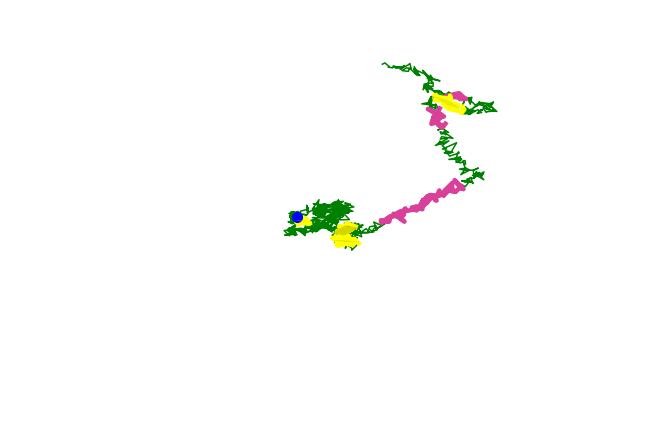

In [27]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')

linesegs = data["baseline"][0][data["baseline"][4]][data["baseline"][5]]
planesegs = data["baseline"][1][data["baseline"][4]][data["baseline"][5]]

crvtmp = crvn

param = mypl.fix_equal_axis(crvtmp.coors)
ax.set_xlim(param['xmin'],param['xmax'])
ax.set_ylim(param['ymin'],param['ymax'])
ax.set_zlim(param['zmin'],param['zmax'])

x, y, z = crvtmp.coors[:,0], crvtmp.coors[:,1], crvtmp.coors[:,2]

ax.scatter(x[0],y[0],z[0],c='blue',s=40)

# 3d
ax.plot(x,y,z,c='green',lw=1)

# line
for seg in linesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c=(0.85,0.25,0.6))

# plane
for seg in planesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c='yellow')
    
    coors = crvtmp.coors[seg[0]:seg[1]+1]
    coef,normal = geo.fit_plane(coors)
    maxx = np.max(coors[:,0])
    maxy = np.max(coors[:,1])
    minx = np.min(coors[:,0])
    miny = np.min(coors[:,1])

    pnt = np.array([0.0, 0.0, coef])
    d = -pnt.dot(normal)

    xx, yy = np.meshgrid([minx, maxx], [miny, maxy])
    zz = (-normal[0]*xx - normal[1]*yy - d)*1. / normal[2]

    ax.plot_surface(xx, yy, zz, color='yellow',alpha=0.4)
    
ax.view_init(azim=50,elev=1)
ax.axis('off');
plt.tight_layout();

## Example 3

Crop info (GIMP): 1353, 102, 2016, 1464

503, 509, 517, 518, 520, 522, 523, 527, 541, 545, 546, 549, 553, 554, 556, 557, 561, 566, 569, 571, 577, 581, 582, 586, 597

### Simulation

In [28]:
# ix = 205, 248
data = simdata[546]
model = data['model']
print("segments:",model.seg_lbl)
print("sigma:",model.sigma)

segments: [1, 1, 2, 0]
sigma: 6


<IPython.core.display.Javascript object>


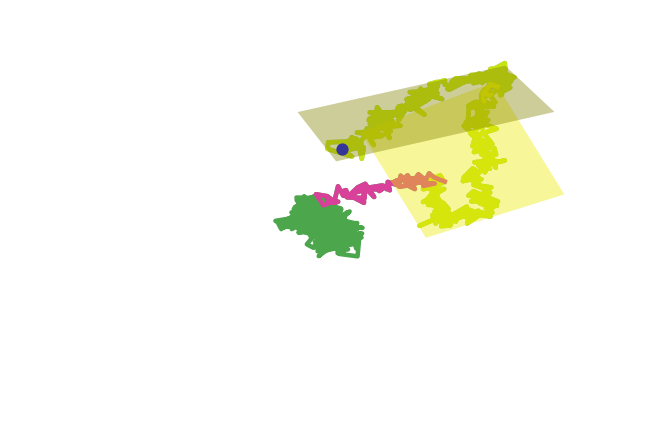

In [29]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection="3d")
model.plot(ax=ax,projection="3d",noisy=True);
ax.view_init(azim=-111,elev=84)
ax.axis('off');
plt.tight_layout();

### Proposed method

In [30]:
print("our method:\n---")
print("predict score:",data["our"][3])
print("predict segment length:",data["our"][4])
print("predict r:",data["our"][5])
print("evaluation detail:")
[print(item) for item in data["our"][2]];

our method:
---
predict score: 0.8580797326974693
predict segment length: 10
predict r: 13
evaluation detail:
[0.7307692307692308, 1.0, 0.5757575757575758]
[0.855429488942312, 1.0, 0.75]
[0.9880404783808647, 1.0, 0.9763636363636363]


{'planeline_pred': [[0, 156], [210, 340], [385, 462]], 'line_pred': [[0, 98], [210, 290], [402, 439]]}


<IPython.core.display.Javascript object>


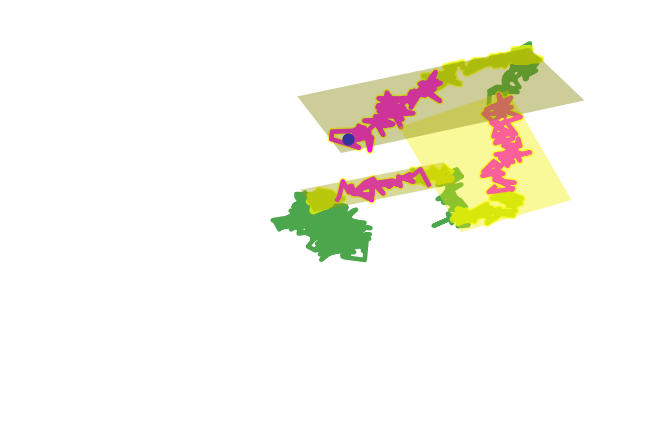

In [31]:
crvn = model.get_curve(noisy=True)
crvnf = crvn.scaled_curve(data['est_noise_scale'])

eps_seg_len = data["our"][4]
sig_c, delta_c = data["our"][6], data["our"][7]/data["our"][6]

res = crvnf.decompose_intrinsicdim(sig_c,delta_c,sig_step,eps_kappa,eps_tau,eps_seg_len,eps_crv_len)
print(res)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
crvnf.plot_intrinsicdim(ax,overrided_curve=crvn);

ax.view_init(azim=-111,elev=84);
ax.axis('off');
plt.tight_layout();

### Baseline

In [32]:
print("baseline:\n---")
print("predict score:",data["baseline"][3])
print("predict segment length:",data["baseline"][4])
print("predict r:",data["baseline"][5])
print("evaluation detail:")
[print(item) for item in data["baseline"][2]];

baseline:
---
predict score: 0.5439153439153439
predict segment length: 10
predict r: 4
evaluation detail:
[0.7428571428571429, 1.0, 0.5909090909090909]
[0.0, 0.0, 0.0]
[0.888888888888889, 1.0, 0.8]


<IPython.core.display.Javascript object>


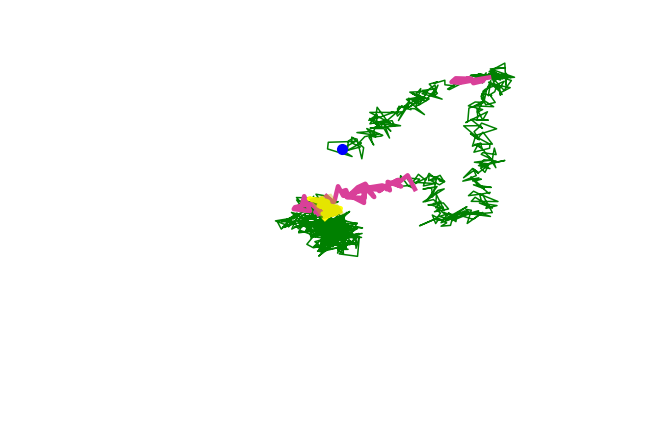

In [33]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')

linesegs = data["baseline"][0][data["baseline"][4]][data["baseline"][5]]
planesegs = data["baseline"][1][data["baseline"][4]][data["baseline"][5]]

crvtmp = crvn

param = mypl.fix_equal_axis(crvtmp.coors)
ax.set_xlim(param['xmin'],param['xmax'])
ax.set_ylim(param['ymin'],param['ymax'])
ax.set_zlim(param['zmin'],param['zmax'])

x, y, z = crvtmp.coors[:,0], crvtmp.coors[:,1], crvtmp.coors[:,2]

ax.scatter(x[0],y[0],z[0],c='blue',s=40)

# 3d
ax.plot(x,y,z,c='green',lw=1)

# line
for seg in linesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c=(0.85,0.25,0.6))

# plane
for seg in planesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c='yellow')
    
    coors = crvtmp.coors[seg[0]:seg[1]+1]
    coef,normal = geo.fit_plane(coors)
    maxx = np.max(coors[:,0])
    maxy = np.max(coors[:,1])
    minx = np.min(coors[:,0])
    miny = np.min(coors[:,1])

    pnt = np.array([0.0, 0.0, coef])
    d = -pnt.dot(normal)

    xx, yy = np.meshgrid([minx, maxx], [miny, maxy])
    zz = (-normal[0]*xx - normal[1]*yy - d)*1. / normal[2]

    ax.plot_surface(xx, yy, zz, color='yellow',alpha=0.4)
    
ax.view_init(azim=-111,elev=84);
ax.axis('off');
plt.tight_layout();

## Example 4

Crop info (GIMP): 357, 600, 2229, 1419

1002, 1006, 1008, 1009, 1011, 1020, 1026, 1036, 1040, 1049, 1052, 1053, 1054, 1056, 1059, 1065, 1081, 1082, 1083, 1084, 1088, 1092, 1096, 1097

### Simulation

In [34]:
data = simdata[1040]
model = data['model']
print("segments:",model.seg_lbl)
print("sigma:",model.sigma)

segments: [2, 1, 0]
sigma: 11


<IPython.core.display.Javascript object>


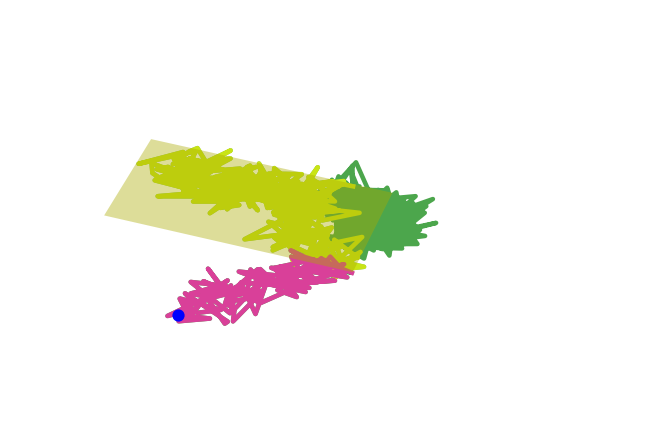

In [35]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection="3d")
model.plot(ax=ax,projection="3d",noisy=True);
ax.view_init(azim=107,elev=17);
ax.axis('off');
plt.tight_layout();

### Proposed method

In [36]:
print("our method:\n---")
print("predict score:",data["our"][3])
print("predict segment length:",data["our"][4])
print("predict r:",data["our"][5])
print("evaluation detail:")
[print(item) for item in data["our"][2]];

our method:
---
predict score: 0.7877512810521631
predict segment length: 10
predict r: 4
evaluation detail:
[0.8058252427184466, 1.0, 0.6747967479674797]
[0.5743440233236152, 0.89375, 0.5382513661202186]
[0.9830845771144278, 1.0, 0.9667318982387475]


{'planeline_pred': [[0, 319], [346, 505]], 'line_pred': [[0, 82], [258, 289], [385, 505]]}


<IPython.core.display.Javascript object>


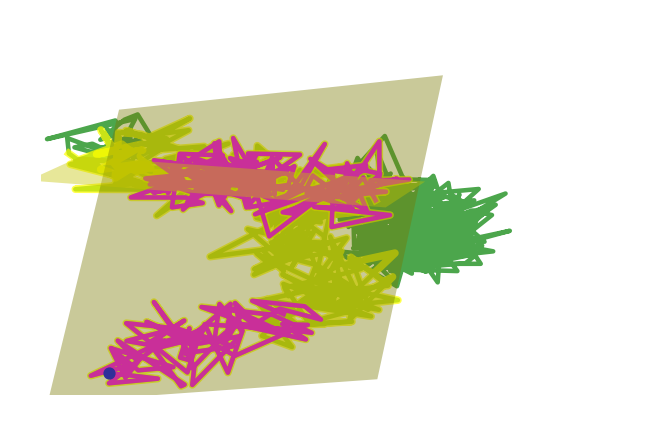

In [37]:
crvn = model.get_curve(noisy=True)
crvnf = crvn.scaled_curve(data['est_noise_scale'])

eps_seg_len = data["our"][4]
sig_c, delta_c = data["our"][6], data["our"][7]/data["our"][6]

res = crvnf.decompose_intrinsicdim(sig_c,delta_c,sig_step,eps_kappa,eps_tau,eps_seg_len,eps_crv_len)
print(res)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
crvnf.plot_intrinsicdim(ax,overrided_curve=crvn);
ax.view_init(azim=107,elev=17)
ax.axis('off');
plt.tight_layout();

### Baseline

In [38]:
print("baseline:\n---")
print("predict score:",data["baseline"][3])
print("predict segment length:",data["baseline"][4])
print("predict r:",data["baseline"][5])
print("evaluation detail:")
[print(item) for item in data["baseline"][2]];

baseline:
---
predict score: 0.40444666633701293
predict segment length: 10
predict r: 25
evaluation detail:
[0.9606299212598425, 0.9312977099236641, 0.991869918699187]
[0.24880382775119617, 1.0, 0.14207650273224043]
[0.00390625, 1.0, 0.0019569471624266144]


<IPython.core.display.Javascript object>


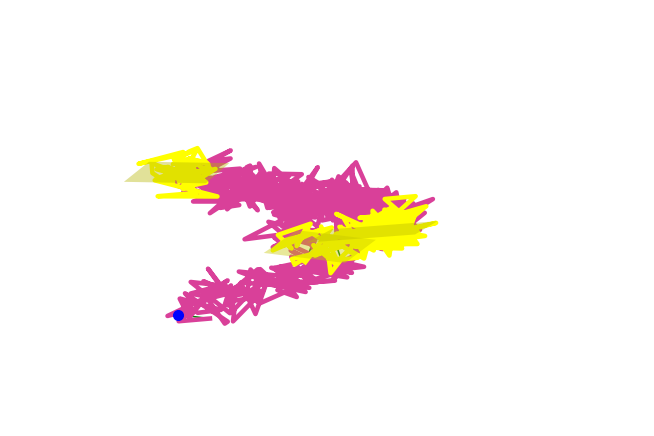

In [39]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')

linesegs = data["baseline"][0][data["baseline"][4]][data["baseline"][5]]
planesegs = data["baseline"][1][data["baseline"][4]][data["baseline"][5]]

crvtmp = crvn

param = mypl.fix_equal_axis(crvtmp.coors)
ax.set_xlim(param['xmin'],param['xmax'])
ax.set_ylim(param['ymin'],param['ymax'])
ax.set_zlim(param['zmin'],param['zmax'])

x, y, z = crvtmp.coors[:,0], crvtmp.coors[:,1], crvtmp.coors[:,2]

ax.scatter(x[0],y[0],z[0],c='blue',s=40)

# 3d
ax.plot(x,y,z,c='green',lw=1)

# line
for seg in linesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c=(0.85,0.25,0.6))

# plane
for seg in planesegs:
    ax.plot(x[seg[0]:seg[1]+1],y[seg[0]:seg[1]+1],z[seg[0]:seg[1]+1],c='yellow')
    
    coors = crvtmp.coors[seg[0]:seg[1]+1]
    coef,normal = geo.fit_plane(coors)
    maxx = np.max(coors[:,0])
    maxy = np.max(coors[:,1])
    minx = np.min(coors[:,0])
    miny = np.min(coors[:,1])

    pnt = np.array([0.0, 0.0, coef])
    d = -pnt.dot(normal)

    xx, yy = np.meshgrid([minx, maxx], [miny, maxy])
    zz = (-normal[0]*xx - normal[1]*yy - d)*1. / normal[2]

    ax.plot_surface(xx, yy, zz, color='yellow',alpha=0.4)
    
ax.view_init(azim=107,elev=17)
ax.axis('off');
plt.tight_layout();